## Business Understanding


### Overview
Tax authorities often struggle to efficiently identify taxpayers who pose compliance risks, resulting in revenue leakage and ineffective audit targeting. With limited resources, it's essential to prioritize audits based on risk levels. This project leverages historical taxpayer data to build a machine learning model that classifies taxpayers into High, Medium, or Low Risk categories. The insights generated can support smarter enforcement, better resource allocation, and improved tax compliance outcomes.



### Business Problem
Tax authorities need a reliable way to identify and prioritize risky taxpayers for audits and enforcement. 
This project seeks to develop a predictive model that uses taxpayer data to classify risk levels and enable more targeted, efficient compliance actions.

To address this, we aim to:
- Predict taxpayers who pose a high compliance risk.
- Identify industries that are more prone to non-compliance.
- rovide actionable insights to audit teams for targeted enforcement decisions.


## Data Understanding
The dataset being used for this project was obtained from kaggle. Here, we are going to review the dataset to assess the structure and characteristics of the data.

In [1]:
!pip install imbalanced-learn

You should consider upgrading via the 'c:\users\ruth\desktop\csa2025\group5_predicting_high_risk_taxpayers_using_ml\njoki\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
#importing necessary liblaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [3]:
#loading our data, that is in csv format
imported_data = pd.read_csv("../data/tax_risk_dataset.csv")

In [4]:
#make a copy of the original data
data=imported_data.copy()

In [5]:
# displaying the first five rows of our data
data.head()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0.0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0.0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0.0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0.0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0.0,Low


In [6]:
# displaying the las 5 records of our data
data.tail()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
995,996,915669.91,914030.05,51162.21,48284.58,2,2,Finance,1639.86,0.94,3,0.0,High
996,997,1539305.96,694695.75,53866.29,27221.88,1,0,Retail,844610.21,0.51,9,0.0,High
997,998,1192252.86,523625.07,31373.59,44797.02,2,1,Retail,668627.79,1.43,0,0.0,Medium
998,999,828646.30,667386.61,55012.65,64433.78,4,0,Tech,161259.69,1.17,3,0.0,High
999,1000,1171774.83,551019.47,47671.11,51606.48,3,2,Tech,620755.36,1.08,9,0.0,High


In [7]:
#knowing the number of rows and columns
data.shape

(1000, 13)

The data has 1000 rows and 13 columns.

In [8]:
# Get general information on the data and each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Taxpayer_ID            1000 non-null   int64  
 1   Revenue                1000 non-null   float64
 2   Expenses               1000 non-null   float64
 3   Tax_Liability          1000 non-null   float64
 4   Tax_Paid               1000 non-null   float64
 5   Late_Filings           1000 non-null   int64  
 6   Compliance_Violations  1000 non-null   int64  
 7   Industry               1000 non-null   object 
 8   Profit                 1000 non-null   float64
 9   Tax_Compliance_Ratio   1000 non-null   float64
 10  Audit_Findings         1000 non-null   int64  
 11  Audit_to_Tax_Ratio     1000 non-null   float64
 12  Risk_Label             1000 non-null   object 
dtypes: float64(7), int64(4), object(2)
memory usage: 101.7+ KB


We have found out that:
- 4 columns are of integer datatype.
- 7 columns are of datatype float.
- There are 2 columns with object datatype.

In [9]:
#get the summary statistics of the columns that contain numerical data.
data.describe()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.0
mean,500.500000,1.005800e+06,7.141672e+05,50087.513200,47812.807910,2.029000,1.033000,2.916324e+05,1.077180,4.396000,0.0
std,288.819436,2.937648e+05,1.994909e+05,14751.814482,10271.325437,1.415685,0.812756,3.617036e+05,0.617086,2.927414,0.0
min,1.000000,2.761980e+04,1.119223e+05,4707.320000,18705.510000,0.000000,0.000000,-7.801314e+05,0.240000,0.000000,0.0
25%,250.750000,8.057229e+05,5.787517e+05,40280.002500,40625.797500,1.000000,0.000000,4.100442e+04,0.767500,2.000000,0.0
50%,500.500000,1.007590e+06,7.126154e+05,49996.240000,48001.845000,2.000000,1.000000,2.856810e+05,0.970000,4.000000,0.0
75%,750.250000,1.194383e+06,8.457764e+05,59913.732500,54669.455000,3.000000,2.000000,5.514364e+05,1.210000,7.000000,0.0
max,1000.000000,2.155819e+06,1.338622e+06,108893.570000,80430.930000,4.000000,2.000000,1.401163e+06,10.190000,9.000000,0.0


As shown in the output above, here we get the count of non-null values, mean, standard deviation, lower and upper quartile, minimum and maximum values of each column in the data.

## Data prearation

#### Data Cleaning
Data cleaning will involve dropping irrelevant columns, checking for duplicates and missing values.

In [10]:
#Dropping unnecesarry columns
data.drop(columns=["Taxpayer_ID","Audit_to_Tax_Ratio"],inplace=True)
data.head()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,High
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,Medium
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,High
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,High
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,Low


In [11]:
#check for duplicates
data.duplicated().sum()

0

In [12]:
# validating that there are no missing values
data.isna().sum()

Revenue                  0
Expenses                 0
Tax_Liability            0
Tax_Paid                 0
Late_Filings             0
Compliance_Violations    0
Industry                 0
Profit                   0
Tax_Compliance_Ratio     0
Audit_Findings           0
Risk_Label               0
dtype: int64

In [13]:
#encoding our risk label column using label encoder
risk_encoder = LabelEncoder()
data["Risk_Label"]=risk_encoder.fit_transform(data["Risk_Label"])
data.head(10)

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0
1,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,2
2,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0
3,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0
4,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,1
5,929758.91,778697.08,53199.41,34645.18,0,2,Manufacturing,151061.83,0.65,8,0
6,1473763.84,879038.64,50018.08,52860.36,2,0,Healthcare,594725.20,1.06,1,2
7,1230230.42,827034.36,37743.67,32526.96,1,2,Finance,403196.06,0.86,3,0
8,859157.68,909910.54,59888.69,58826.91,3,0,Healthcare,-50752.86,0.98,0,0
9,1162768.01,592952.96,64063.55,43288.75,0,2,Healthcare,569815.05,0.68,1,0


In [14]:
imported_data.head(10)

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0.0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0.0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0.0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0.0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0.0,Low
5,6,929758.91,778697.08,53199.41,34645.18,0,2,Manufacturing,151061.83,0.65,8,0.0,High
6,7,1473763.84,879038.64,50018.08,52860.36,2,0,Healthcare,594725.20,1.06,1,0.0,Medium
7,8,1230230.42,827034.36,37743.67,32526.96,1,2,Finance,403196.06,0.86,3,0.0,High
8,9,859157.68,909910.54,59888.69,58826.91,3,0,Healthcare,-50752.86,0.98,0,0.0,High
9,10,1162768.01,592952.96,64063.55,43288.75,0,2,Healthcare,569815.05,0.68,1,0.0,High


In [15]:
#encoding our Industry column using label encoder
industry_encoder=LabelEncoder()
data["Industry"]=industry_encoder.fit_transform(data["Industry"])
data.head(10)

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1149014.25,979871.09,39872.33,28921.92,2,1,0,169143.16,0.73,0,0
1,958520.71,884926.74,47832.22,39396.15,1,1,3,73593.97,0.82,0,2
2,1194306.56,711926.07,38113.70,43863.94,4,0,2,482380.49,1.15,3,0
3,1456908.96,570612.64,45380.58,66876.88,4,2,0,886296.32,1.47,1,0
4,929753.99,839644.66,21595.78,53565.53,0,0,4,90109.33,2.48,2,1
5,929758.91,778697.08,53199.41,34645.18,0,2,2,151061.83,0.65,8,0
6,1473763.84,879038.64,50018.08,52860.36,2,0,1,594725.20,1.06,1,2
7,1230230.42,827034.36,37743.67,32526.96,1,2,0,403196.06,0.86,3,0
8,859157.68,909910.54,59888.69,58826.91,3,0,1,-50752.86,0.98,0,0
9,1162768.01,592952.96,64063.55,43288.75,0,2,1,569815.05,0.68,1,0


We used label encoding over onehotencoding due to the nature of data we have. 
For the Risk_label, the label encoder has transformed: 
- high-0
- medium-2
- low-1
  
For Industry, the label encoder has transformed:
- Finance - 0
- Heathcare -1
- Manufacturing -2
- Retail -3
- Tech -4

## Exploratory Data Analysis

### Distribution of numerical features

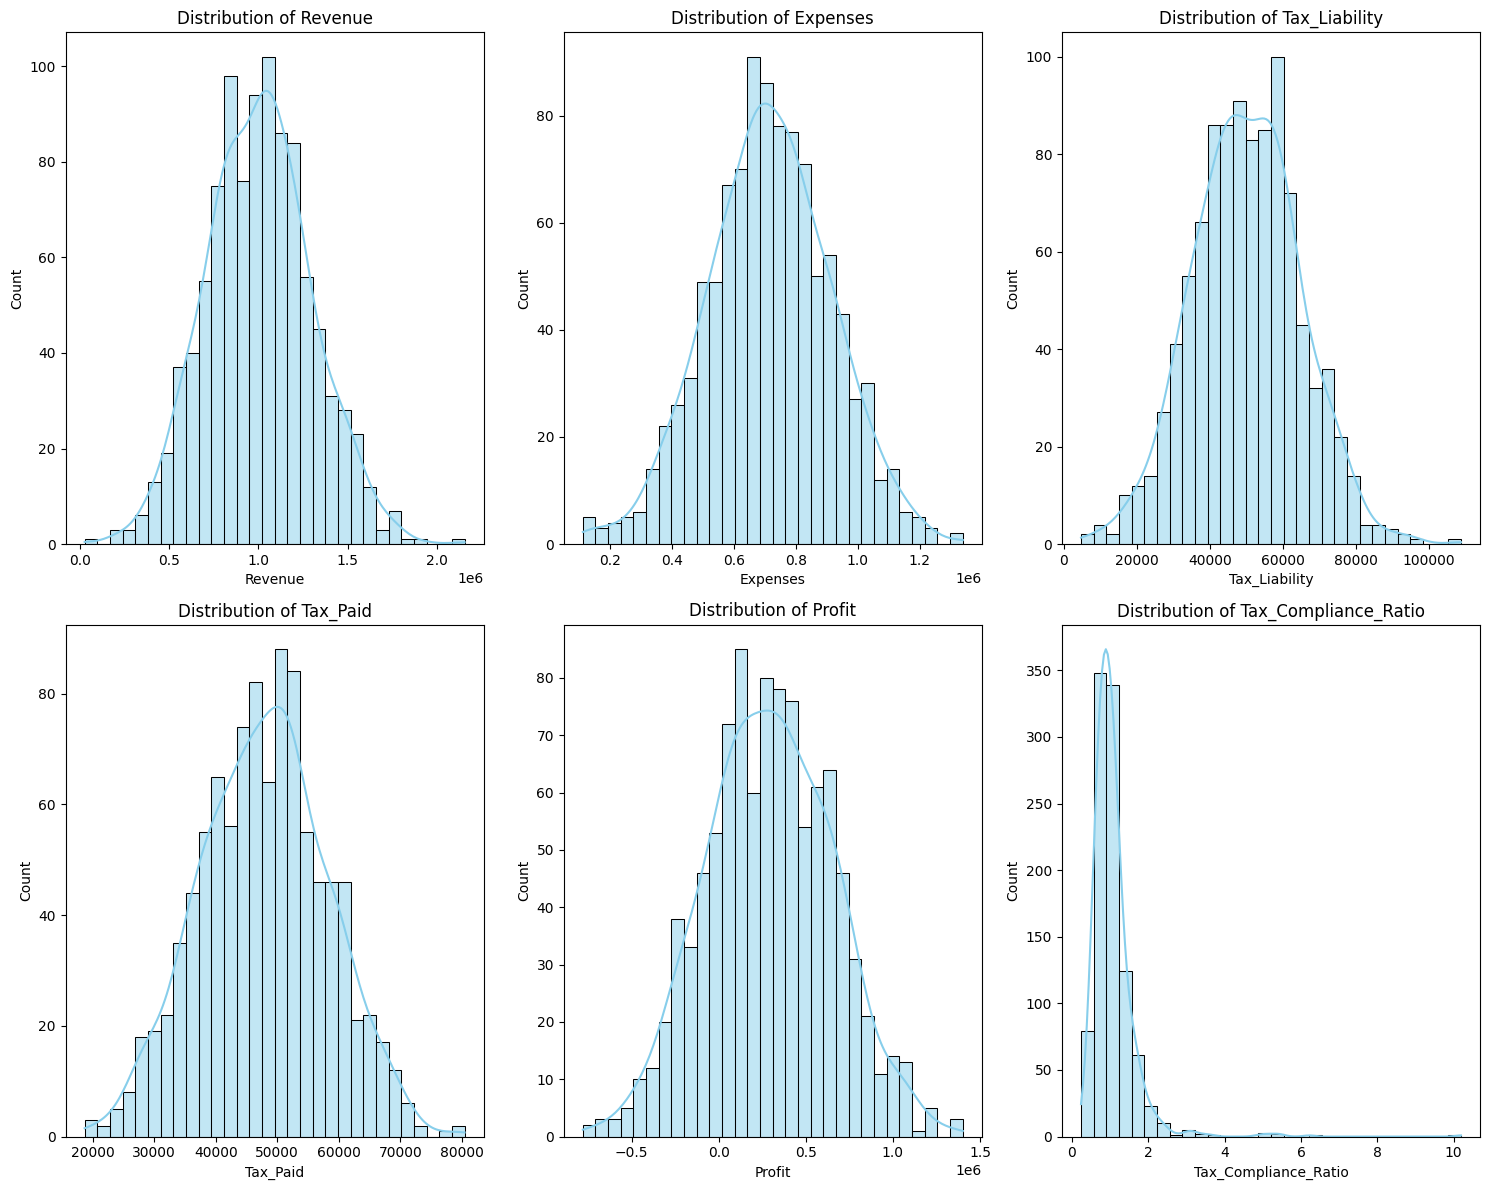

In [16]:
# disribution of numercal columns
numeric_cols = ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid',
                'Profit', 'Tax_Compliance_Ratio']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Count plot Risk_Label 

In [17]:
# checking how the Risk_Label column is balanced
data["Risk_Label"].value_counts()

Risk_Label
0    736
1    152
2    112
Name: count, dtype: int64

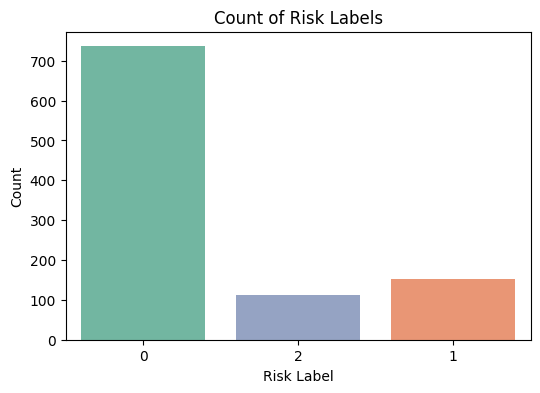

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Risk_Label', hue='Risk_Label', order=[0, 2, 1], palette='Set2', legend=False)
plt.title('Count of Risk Labels')
plt.xlabel('Risk Label')
plt.ylabel('Count')
plt.show()

### Count Plot of Industry

In [19]:
# checking how the industry column is balanced
data["Industry"].value_counts()

Industry
3    233
0    213
4    188
1    188
2    178
Name: count, dtype: int64

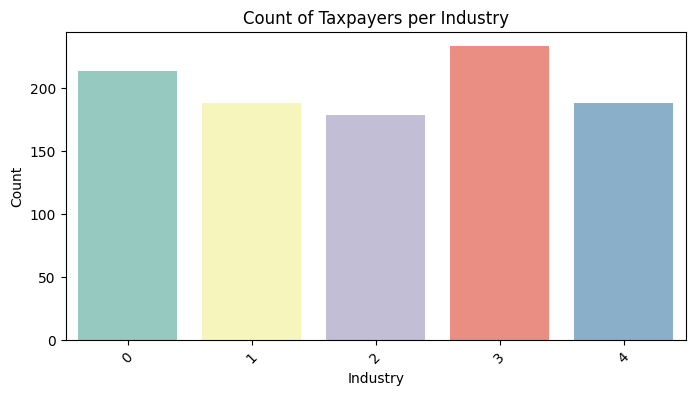

In [20]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Industry', hue='Industry', palette='Set3', legend=False)
plt.title('Count of Taxpayers per Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Distribution of Industry by Risk_label

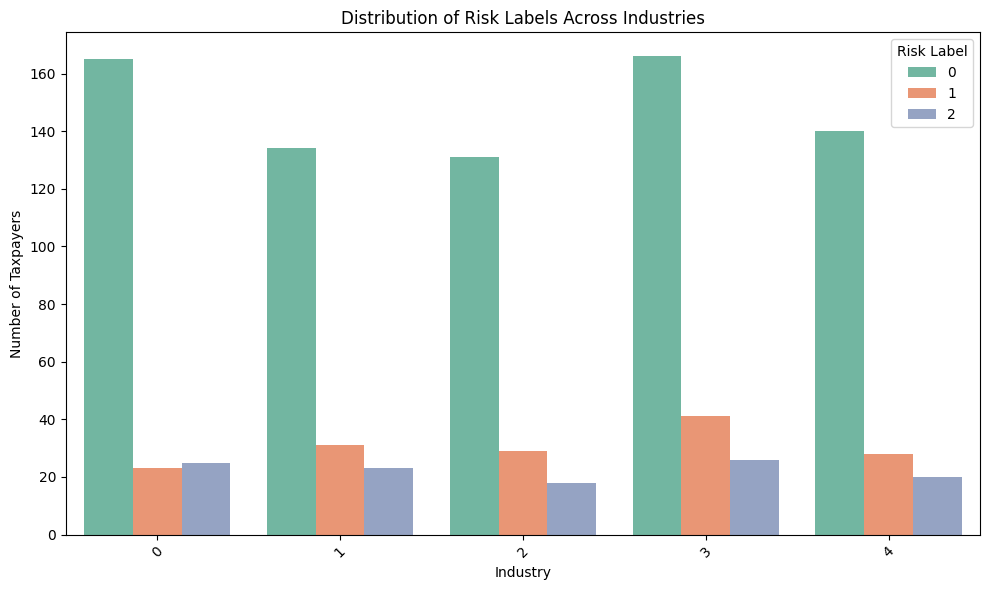

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Industry', hue='Risk_Label', palette='Set2')

plt.title('Distribution of Risk Labels Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Taxpayers')
plt.legend(title='Risk Label')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
data.head()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Risk_Label
0,1149014.25,979871.09,39872.33,28921.92,2,1,0,169143.16,0.73,0,0
1,958520.71,884926.74,47832.22,39396.15,1,1,3,73593.97,0.82,0,2
2,1194306.56,711926.07,38113.70,43863.94,4,0,2,482380.49,1.15,3,0
3,1456908.96,570612.64,45380.58,66876.88,4,2,0,886296.32,1.47,1,0
4,929753.99,839644.66,21595.78,53565.53,0,0,4,90109.33,2.48,2,1


#### Relationship between Risk_label and columns with numerical data i.e Revenue, Expenses, Tax_Liability, Tax_Paid, Late_Filings, Compliance_Violations, Profit,Tax_Compliance_Ratio and Audit_Findings

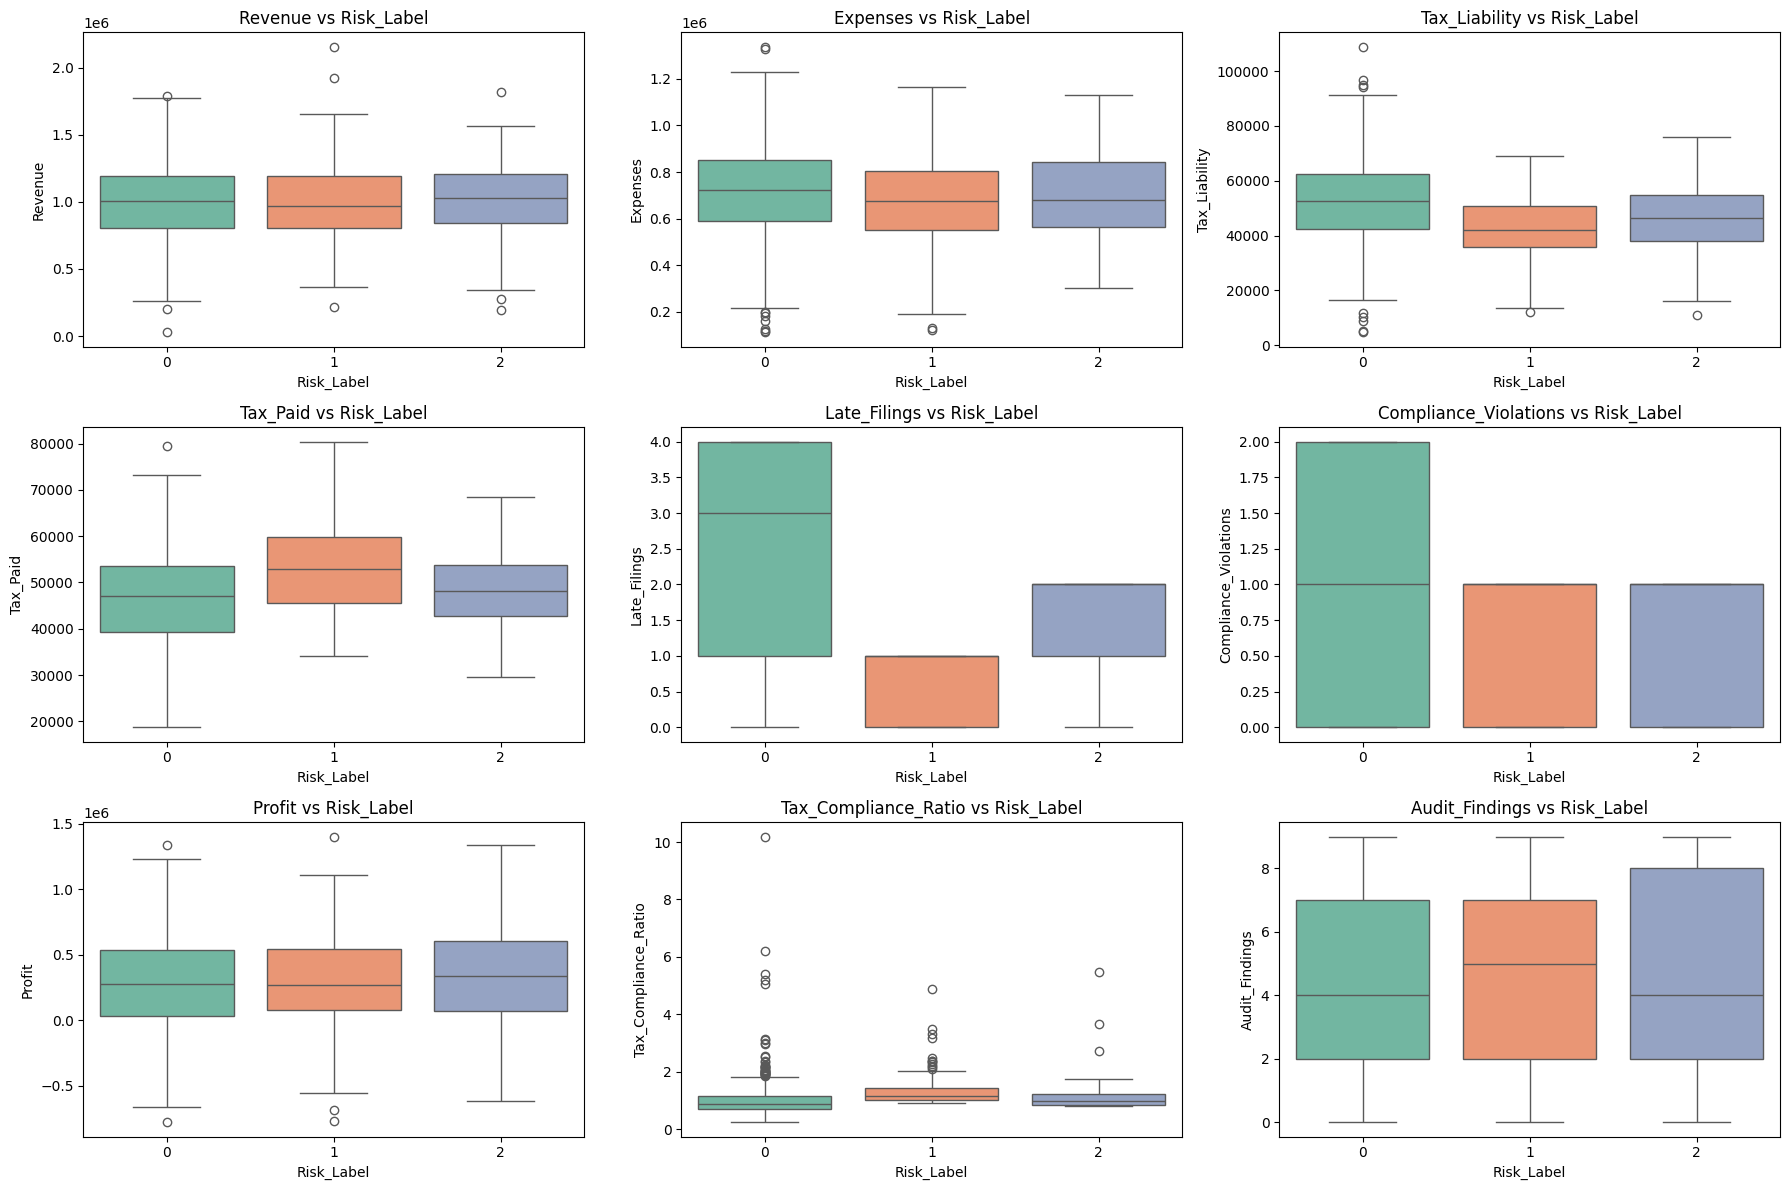

In [23]:
# Select only numerical columns (excluding 'Industry' and 'Risk_Label')
columns = data.drop(columns=['Industry', 'Risk_Label'], axis=1).columns

# Set up a grid of subplots (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Loop through numerical columns and plot boxplots
for i, col in enumerate(columns):
    sns.boxplot(data=data, x='Risk_Label', y=col, ax=axes[i], hue='Risk_Label', palette='Set2', legend=False)
    axes[i].set_title(f'{col} vs Risk_Label')
    axes[i].set_xlabel('Risk_Label')
    axes[i].set_ylabel(col)

# In case there are fewer columns than subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])  # remove unused axes
    
plt.tight_layout()
plt.show()

### Correlation Analysis

In [24]:
# # Plot heatmap
# num_data=data.select_dtypes(include="number")
# plt.figure(figsize=(16, 6))
# correlation_matrix = num_data.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')

# plt.show()

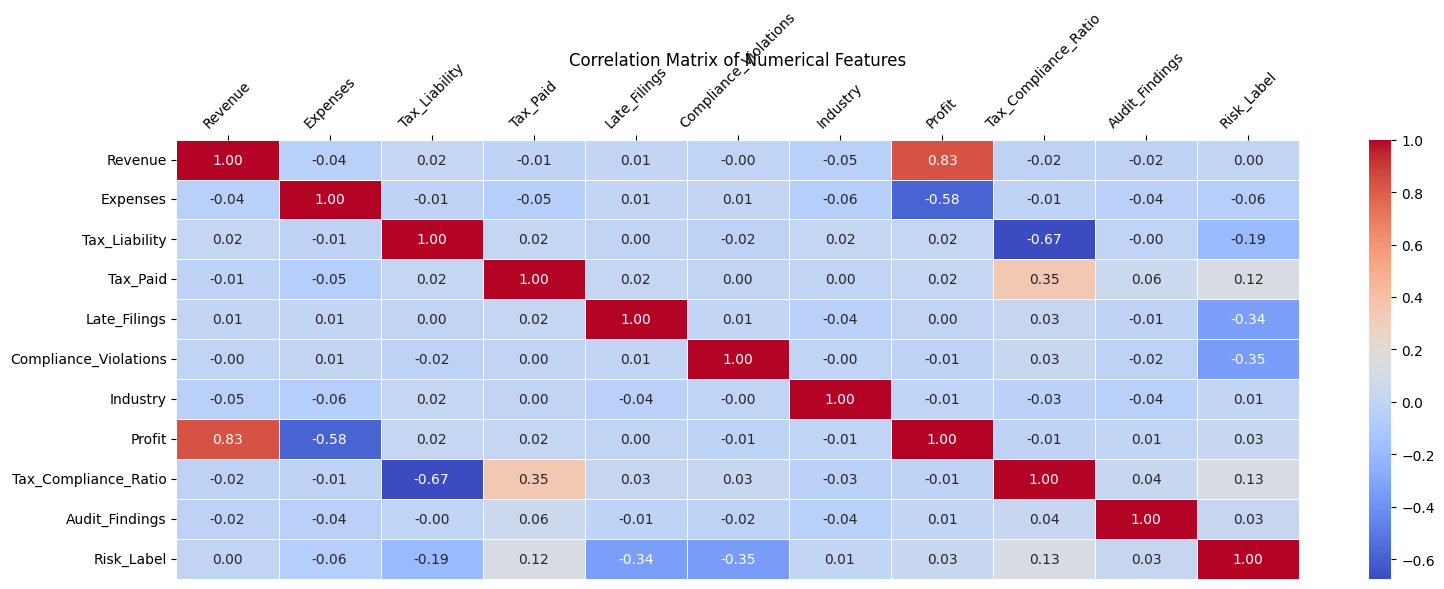

In [25]:
# Plot heatmap
num_data=data.select_dtypes(include="number")
plt.figure(figsize=(16, 6))
corr_matrix = num_data.corr()
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Move x-axis labels to the top
ax.xaxis.set_ticks_position('top')  # move ticks
ax.xaxis.set_label_position('top')  # move labels
plt.xticks(rotation=45)  # rotate x labels for readability
plt.title("Correlation Matrix of Numerical Features", y=1.15)  # push title up

plt.tight_layout()
plt.show()

### Train-Test Split

In [26]:
# Define Features and Target
X = data.drop(columns=['Risk_Label'])  # Features
y = data['Risk_Label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SMOTE for Risk label Imbalance

There is a clear imbalance of the target variable 'Risk_Label' with a large number of high risk taxpayers as compared to medium and low, as shown in count plot Risk Label above. This imbalance could affect model performance, especially for algorithms like Logistic Regression, which are sensitive to class imbalance.

We are going to apply SMOTE to the training dataset. SMOTE will generate synthetic samples to balance the dataset, making the minority class more represented and helping the Logistic Regression model make better predictions for risky taxpayers.

In [27]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Standardization
To ensure that each feature contributes equally to the model.

In [28]:
cat=["Industry"]
num=X.drop(cat,axis=1).columns

# Initialize StandardScaler
std_scaler=StandardScaler()
X_train_scaled=std_scaler.fit_transform(X_train[num])
X_train_scaled_resampled=std_scaler.fit_transform(X_train_resampled[num])
X_test_scaled = std_scaler.transform(X_test[num])

# Convert to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num)
X_train_scaled_resampled=pd.DataFrame(X_train_scaled_resampled,columns=num)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num)

# Combine scaled numerical columns with categorical one, that is Industry.
X_train_scaled = pd.concat([X_train_scaled, X_train[cat].reset_index(drop=True)], axis=1)
X_train_scaled_resampled=pd.concat([X_train_scaled_resampled,X_train_resampled[cat].reset_index(drop=True)],axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[cat].reset_index(drop=True)], axis=1)


In [29]:
X_train_scaled.sample()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Profit,Tax_Compliance_Ratio,Audit_Findings,Industry
351,1.369183,-0.071095,-1.431661,-1.005343,1.413867,-1.291593,1.141653,0.417598,1.597472,4


In [30]:
X_train_scaled_resampled.sample()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Profit,Tax_Compliance_Ratio,Audit_Findings,Industry
1110,0.123714,-0.13429,-1.347279,1.529881,-1.11725,0.480368,0.168133,2.105346,-0.814571,3


In [31]:
X_test_scaled.sample()

,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Profit,Tax_Compliance_Ratio,Audit_Findings,Industry
18,0.102001,0.795699,-0.76285,-0.152739,-1.11725,1.829972,-0.333119,0.242827,0.303963,2


## Modelling

We will be comparing two models here:

- Logistic regression model. 
- Random forest classifier.

In [32]:
# Logistic regression model
# model initialization
logreg=LogisticRegression(max_iter=1000, random_state=42)

# Train models on the resampled, scaled training data
logreg.fit(X_train_scaled_resampled,y_train_resampled)

# Make predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)



### Model Evaluation

In [33]:
from sklearn.preprocessing import label_binarize

# Logistic Regression results
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))

# Binarize the multiclass labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Ensure order matches encoded labels

# Get predicted probabilities for each class
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)

# Compute ROC AUC for multiclass (one-vs-rest)
roc_auc_logreg = roc_auc_score(y_test_bin, y_pred_proba_logreg, multi_class='ovr')
print(f"Logistic Regression ROC-AUC Score: {roc_auc_logreg:.4f}")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       146
           1       0.68      0.81      0.74        32
           2       0.36      0.59      0.45        22

    accuracy                           0.79       200
   macro avg       0.66      0.74      0.69       200
weighted avg       0.83      0.79      0.80       200

Logistic Regression ROC-AUC Score: 0.9309


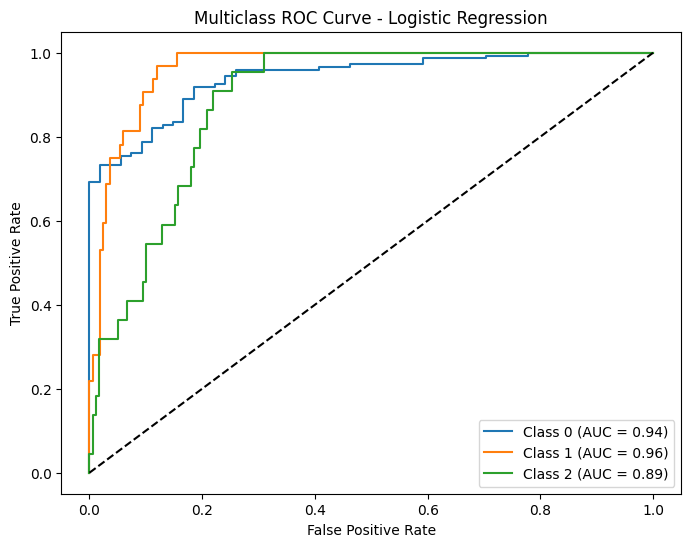

In [34]:
# Binarize labels (for 3 classes: 0=High, 1=Low, 2=Medium)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Get predicted probabilities
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_logreg[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on SMOTE-resampled and scaled data
rf_clf.fit(X_train_scaled_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      0.91      0.95        32
           2       0.88      1.00      0.94        22

    accuracy                           0.98       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.99      0.98      0.99       200

Random Forest ROC-AUC Score: 0.9997


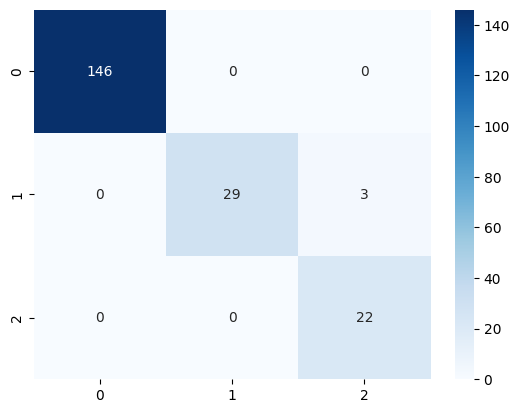

In [36]:

from sklearn.metrics import confusion_matrix# Class predictions
y_pred_rf = rf_clf.predict(X_test_scaled)

# Predicted probabilities (for ROC-AUC)
y_pred_proba_rf = rf_clf.predict_proba(X_test_scaled)


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
# Ensure y_test is binarized for multiclass AUC calculation
y_test_bin_rf = label_binarize(y_test, classes=[0, 1, 2])

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")

# Compute AUC score (One-vs-Rest)
roc_auc_rf = roc_auc_score(y_test_bin_rf, y_pred_proba_rf, multi_class='ovr')

print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")